In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Preprocesamiento de datos:

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

In [2]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

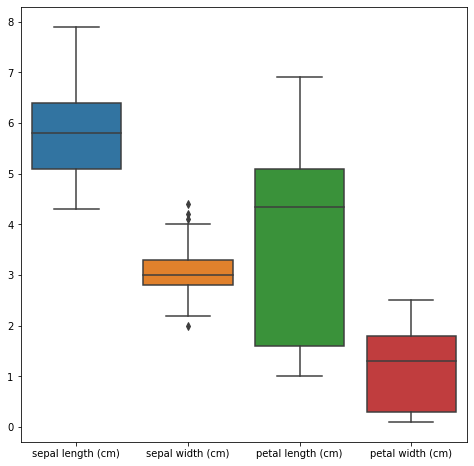

In [3]:
plt.figure(figsize=(8,8))
sns.boxplot(data=pd.DataFrame(data['data'],columns=data['feature_names']))
plt.show()

In [4]:
array_standardized = StandardScaler().fit_transform(data['data'])
df_standardized = pd.DataFrame(array_standardized,columns=data['feature_names'])
#Esto lo hago para desordenar las columnas(solo para este caso)
columnas=list(df_standardized.columns)
np.random.seed(7)
np.random.shuffle(columnas)
df_standardized=df_standardized[columnas]
#######################
df_standardized

,petal length (cm),sepal width (cm),sepal length (cm),petal width (cm)
0,-1.340227,1.019004,-0.900681,-1.315444
1,-1.340227,-0.131979,-1.143017,-1.315444
2,-1.397064,0.328414,-1.385353,-1.315444
3,-1.283389,0.098217,-1.506521,-1.315444
4,-1.340227,1.249201,-1.021849,-1.315444
...,...,...,...,...
145,0.819596,-0.131979,1.038005,1.448832
146,0.705921,-1.282963,0.553333,0.922303
147,0.819596,-0.131979,0.795669,1.053935
148,0.933271,0.788808,0.432165,1.448832


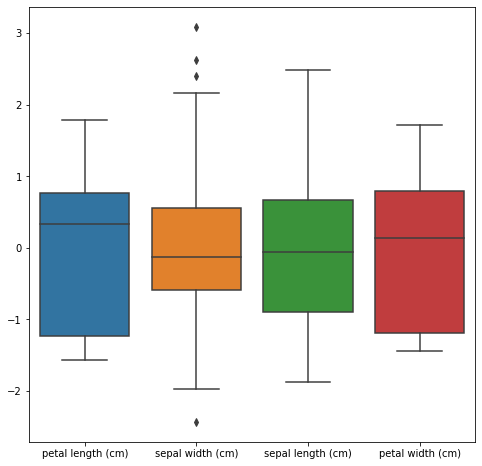

In [5]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df_standardized)
plt.show()

# PCA:

In [6]:
# Matriz de covarianzas
cov = df_standardized.cov().values
cov, df_standardized

(array([[ 1.00671141, -0.43131554,  0.87760447,  0.96932762],
        [-0.43131554,  1.00671141, -0.11835884, -0.36858315],
        [ 0.87760447, -0.11835884,  1.00671141,  0.82343066],
        [ 0.96932762, -0.36858315,  0.82343066,  1.00671141]]),
      petal length (cm)  sepal width (cm)  sepal length (cm)  petal width (cm)
 0            -1.340227          1.019004          -0.900681         -1.315444
 1            -1.340227         -0.131979          -1.143017         -1.315444
 2            -1.397064          0.328414          -1.385353         -1.315444
 3            -1.283389          0.098217          -1.506521         -1.315444
 4            -1.340227          1.249201          -1.021849         -1.315444
 ..                 ...               ...                ...               ...
 145           0.819596         -0.131979           1.038005          1.448832
 146           0.705921         -1.282963           0.553333          0.922303
 147           0.819596         -0.1319

In [7]:
# Autovalores y autovectores
eig_values,eig_vectors = np.linalg.eig(cov)
eig_values,eig_vectors

(array([2.93808505, 0.02085386, 0.14774182, 0.9201649 ]),
 array([[ 0.5804131 , -0.80144925, -0.14212637, -0.02449161],
        [-0.26934744, -0.12350962, -0.24438178, -0.92329566],
        [ 0.52106591,  0.26128628,  0.71956635, -0.37741762],
        [ 0.56485654,  0.52359713, -0.63427274, -0.06694199]]))

In [8]:
eig_vectors=eig_vectors.T
eig_values=eig_values[0:2]


org=np.argsort(eig_values)[::-1]

eig_vectors,eig_values,org


(array([[ 0.5804131 , -0.26934744,  0.52106591,  0.56485654],
        [-0.80144925, -0.12350962,  0.26128628,  0.52359713],
        [-0.14212637, -0.24438178,  0.71956635, -0.63427274],
        [-0.02449161, -0.92329566, -0.37741762, -0.06694199]]),
 array([2.93808505, 0.02085386]),
 array([0, 1], dtype=int64))

In [9]:
# Porcentaje de varianza explicada
eig_values/eig_values.sum()

array([0.99295225, 0.00704775])

In [10]:
# Autovectores correspondientes a los mayores autovalores
max_eigvalues = eig_values.argsort()[-2:][::-1]
max_eigvectors = eig_vectors[:,max_eigvalues]
max_eigvectors

array([[ 0.5804131 , -0.26934744],
       [-0.80144925, -0.12350962],
       [-0.14212637, -0.24438178],
       [-0.02449161, -0.92329566]])

In [11]:
# Proyeccion de datos sobre autovectores
array_projected = np.dot(array_standardized,max_eigvectors)
array_projected

array([[-1.11674854e+00,  1.65881028e+00],
       [-3.34948252e-01,  1.86624037e+00],
       [-8.36507042e-01,  1.88853988e+00],
       [-7.38499630e-01,  1.92182759e+00],
       [-1.37156698e+00,  1.66301502e+00],
       [-1.67441244e+00,  1.16243451e+00],
       [-1.28711849e+00,  1.72888765e+00],
       [-1.01066303e+00,  1.70598802e+00],
       [-5.02094321e-01,  2.05785316e+00],
       [-5.24293490e-01,  1.94545425e+00],
       [-1.28282643e+00,  1.49014845e+00],
       [-1.15939596e+00,  1.75737050e+00],
       [-4.02051787e-01,  2.02041205e+00],
       [-7.29454589e-01,  2.22526342e+00],
       [-1.53075554e+00,  1.31597898e+00],
       [-2.36972911e+00,  9.50148230e-01],
       [-1.64210005e+00,  1.21799464e+00],
       [-1.11997242e+00,  1.53727486e+00],
       [-1.27571528e+00,  1.21449268e+00],
       [-1.68152359e+00,  1.43809028e+00],
       [-7.45509549e-01,  1.54766293e+00],
       [-1.50025645e+00,  1.34498637e+00],
       [-1.62056427e+00,  1.84912017e+00],
       [-7.

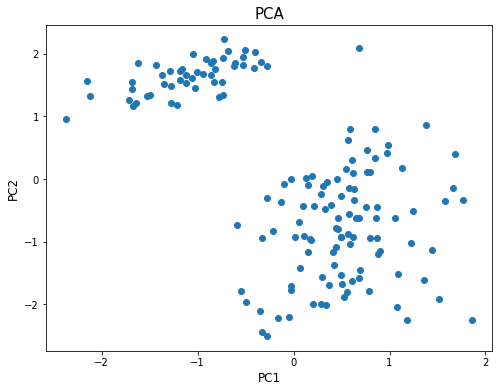

In [12]:
# Visulizacion de datos en las 2 componentes principales
plt.figure(figsize=(8,6))
plt.scatter(*array_projected.T)
plt.title("PCA", size=15)
plt.xlabel("PC1", size=12)
plt.ylabel("PC2", size=12)
plt.show()

# Scikit-learn:

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2).fit(df_standardized.values) # Objeto PCA

In [15]:
pca.components_ # Autovectores

array([[ 0.5804131 , -0.26934744,  0.52106591,  0.56485654],
       [ 0.02449161,  0.92329566,  0.37741762,  0.06694199]])

In [16]:
pca.explained_variance_ # Autovalores

array([2.93808505, 0.9201649 ])

In [17]:
pca.explained_variance_ratio_ # Porcentaje de varianza explicada

array([0.72962445, 0.22850762])

In [20]:
pca_projection = pca.transform(df_standardized.values) # Datos proyectados en componentes principales
pca_projection

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

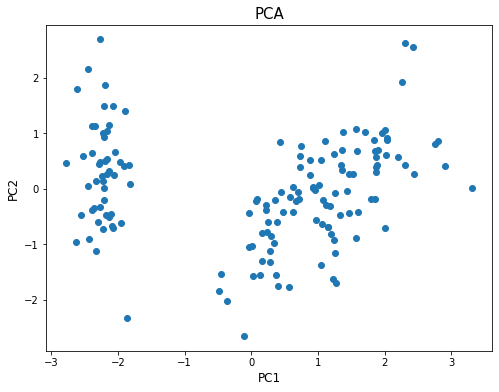

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(*pca_projection.T)
plt.title("PCA", size=15)
plt.xlabel("PC1", size=12)
plt.ylabel("PC2", size=12)
plt.show()

Visualizacion 3D: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
